**TWEETER SENTIMENT**

1. **BUSINESS UNDERSTANDING**
   
1.1 **OVERVIEW**

In our modern, technology-driven society, social media platforms, especially Twitter, have become a central hub for expressing thoughts, emotions, and viewpoints. Fortunately, advancements in technology have provided us with the tools to analyze and assess these opinions. Through the application of machine learning and natural language processing, we have a method to examine a collection of text and determine its sentiment.
According to a report from statista.com, as of December 2022, Twitter boasted an impressive user base of over 368 million monthly active users worldwide. Handling such a vast volume of tweets manually would be an almost impossible and incredibly costly endeavor. However, with the right computational resources and a well-structured dataset for training and testing machine learning models, we can swiftly analyze thousands of tweets, gaining valuable insights into public sentiment on various topics.
Understanding how a consumer perceives a brand can offer valuable insight into their buying habits, which in return, can significantly impact the financial success of the company behind the brand.
Apple offers a diverse range of products, including hardware devices, software and services that are diverse.Their products range from the iconic iPhone and Mac computers to wearables like the Apple watch and a suite of services that are convinient. This has made Apple company to be a global technology leder, synonymous with innovation, design, excellence and pushing boundaries in the world of consumer electronics.
On the other hand, Google is a tech giant that has delved into enhancing and organising the worlds information, virtually every aspect of our digital lives. Google has evolved into a multifaceted company with a wide range of products and services that span to search, cloud computing and artificial intelligence from its inception as a search engine. Some of its application are Gmail, google maps and android operating systems.
The project aims to build a model that rates the sentiment of tweets based on its content for Apple and Google products .

1.2 **PROBLEM STATEMENT**

The current systems that the platform employs does not provide rating of the tweets based on their content by users. This presents a challange to Apple and Google on how to gauge their customers satisfaction of their products and categorize opinions in real-time. The new system aims to bypass these isues and gather insight into real-time customer sentiment on their products.
Chemami Ent. is a platform that focuses on analyzing customer feedbacks on products by various brands. this gives an opportunity to brands to learn what makes customers happy or un unhappy about their products, so that they can tailor products to meet their customers' needs.

1.3 **OBJECTIVE**

To build a model that can rate sentiment of a tweet based on its content of Apple and Google products.


2. **DATA UNDERSTANDING**

The dataset was sourced from CrowdFlower via https://data.world/crowdflower/brands-and-product-emotionsis from the year 2013 and has 8,721 tweets. There are three features in this dataset.

i.   Tweet text

ii.  Emotion in the tweet is directed at.

iii. Emotion directed at a brand or product.

3. **DATA PREPARATION**

3.1 **Importing relevant libraries**

To initiate the analysis, we import the required libraries. These libraries offer essential functionalities for data manipulation, visualization, and statistical analysis, providing the groundwork for our project.



In [150]:
!pip install nltk
# import important modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
import re
nltk.download('omw-1.4')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


!pip install wordcloud
import matplotlib as mpl
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



[nltk_data] Downloading package omw-1.4 to C:\Users\Margaret
[nltk_data]     Mitey\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


3.1 **Loading the Dataset**

In [151]:
df = pd.read_csv(r'c:\Users\Margaret Mitey\OneDrive\Documents\judge_1377884607_tweet_product_company.csv')

3.2 **Previewing the Dataset**

In [152]:
df.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [153]:
df.shape

(8721, 3)

In [154]:
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

3.3 **Cleaning the Dataset**

To make it easier to read and analyse the data, we rename the columns and simplify the sentiment column. Removing duplicates, I can't tell sentiment and missing values.Also to ensure that the Product column is correctly aligned to the Tweet column based on its content

In [155]:
#Renaming the columns
df = df.rename(columns = {'tweet_text': 'Tweet', 
                         'emotion_in_tweet_is_directed_at': 'Product', 
                         'is_there_an_emotion_directed_at_a_brand_or_product': 'Sentiment'})
df.head()

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [156]:
#Simplify sentiment labels 
dict_sent = {'No emotion toward brand or product':"No emotion", 
             'Positive emotion':'Positive emotion',
             'Negative emotion':'Negative emotion',
             "I can't tell": "I can't tell"}
df['Sentiment'] = df['Sentiment'].map(dict_sent)

In [157]:
df["Sentiment"].value_counts()

No emotion          5156
Positive emotion    2869
Negative emotion     545
I can't tell         151
Name: Sentiment, dtype: int64

In [158]:
# check missing values in data
df.isnull().sum()

Tweet           1
Product      5552
Sentiment       0
dtype: int64

In [159]:
# Print the value count of product and sentiment column
print(df['Product'].value_counts())
print(("-"*40))
print(df['Sentiment'].value_counts())

iPad                               910
Apple                              640
iPad or iPhone App                 451
Google                             412
iPhone                             288
Other Google product or service    282
Android App                         78
Android                             74
Other Apple product or service      34
Name: Product, dtype: int64
----------------------------------------
No emotion          5156
Positive emotion    2869
Negative emotion     545
I can't tell         151
Name: Sentiment, dtype: int64


In [160]:
# Check for duplicated rows
print('Total duplicated rows')
print(df.duplicated().sum())
print(("-"*40))

# Check for null values
print('Total null values')
print(df.isna().sum())

Total duplicated rows


22
----------------------------------------
Total null values
Tweet           1
Product      5552
Sentiment       0
dtype: int64


In [161]:
#Dropping duplicates
df.drop_duplicates(inplace=True)
df

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
8716,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8717,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion
8718,"Google's Zeiger, a physician never reported po...",NaN,No emotion
8719,Some Verizon iPhone customers complained their...,NaN,No emotion


In [162]:
#drop any NaN in the Tweet column
df.dropna(subset=['Tweet', 'Product'], inplace=True)
df

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
8706,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion
8708,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion
8709,Diller says Google TV &quot;might be run over ...,Other Google product or service,Negative emotion
8713,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion


In [163]:
# check missing values in data
df.isnull().sum()

Tweet        0
Product      0
Sentiment    0
dtype: int64

In [164]:
#Fills NaN's with "Undefined" to help with data visualizations
df['Product'].fillna("Undefined", inplace = True)
df

,Tweet,Product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
8706,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion
8708,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion
8709,Diller says Google TV &quot;might be run over ...,Other Google product or service,Negative emotion
8713,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion


In [165]:
df = df[df['Sentiment'] != "I can't tell"]

In [166]:
# Print the value count of product and sentiment column
print(df['Product'].value_counts())
print(("-"*40))
print(df['Sentiment'].value_counts())

iPad                               905
Apple                              636
iPad or iPhone App                 450
Google                             409
iPhone                             286
Other Google product or service    281
Android App                         77
Android                             73
Other Apple product or service      34
Name: Product, dtype: int64
----------------------------------------
Positive emotion    2569
Negative emotion     495
No emotion            87
Name: Sentiment, dtype: int64


Cleaning and preprocessing the Product column of the DataFrame based on keywords found in the Tweet column to assign proper product labels. This is to ensure that product category is correctly labeled in the dataset.

In [167]:
df["Product"].fillna("none", inplace = True)
df_none = df.loc[df["Product"] == 'none']

apple_condition = (df['Product'] == "iPad") | (df['Product'] == "iPad or iPhone App") | (df['Product'] == "iPhone") | (df['Product'] == "Other Apple product or service")
google_condition = (df['Product'] == "Other Google product or service") | (df['Product'] == "Android App") | (df['Product'] == "Android") 
df.loc[apple_condition,'Product'] = "Apple"
df.loc[google_condition, 'Product'] = "Google"

# apple loop
for word in ["Apple","iphone","apple","ipad","ipad2","iPad 2","iPhone","iPad"]:
    temp_df = df_none[df_none['Tweet'].str.contains(word)]
    temp_df['Product'].replace({'none': 'Apple'}, inplace=True)
    df_none = temp_df.combine_first(df_none)
# google loop
for word in ["Google","google","Android","android"]:
    temp_df = df_none[df_none['Tweet'].str.contains(word)]
    temp_df['Product'].replace({'none': 'Google'}, inplace=True)
    df_none = temp_df.combine_first(df_none)
df_1 = df_none.combine_first(df)


C:\Users\Margaret Mitey\AppData\Local\Temp\ipykernel_6820\3422809122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Product"].fillna("none", inplace = True)
C:\Users\Margaret Mitey\AppData\Local\Temp\ipykernel_6820\3422809122.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[apple_condition,'Product'] = "Apple"
C:\Users\Margaret Mitey\AppData\Local\Temp\ipykernel_6820\3422809122.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [168]:
df_1 = df_1[df_1['Product'] != "none"]
df_1 = df_1[df_1['Sentiment'] != "I can't tell"]

4. **EXPLORATORY DATA ANALYSIS**

Exploratory Data Analysis (EDA) is a critical step in the data analysis process that involves examining and visualizing data to gain insights, detect patterns, understand the underlying structure of the dataset ids in decision-making, and sets the stage for more advanced analyses. By conducting a thorough EDA, you can make better-informed decisions, build more accurate models, and derive actionable insights from your data.

In [200]:
#Labeling products that are not classified to either Apple of Google and lowring the case
def find_Product(Product, Tweet):
    if pd.notna(Product) and Product == 'Undetermined':
        if pd.notna(Tweet):
            lower_tweet = Tweet.lower()  # Make tweet lowercase
            is_google = ('google' in lower_tweet) or ('android' in lower_tweet)  
            is_apple = ('apple' in lower_tweet) or ('ip' in lower_tweet) 
            if is_google:
                return 'Google'
            elif is_apple:
                return 'Apple'
    return Product

df['Product'] = df.apply(lambda x: find_Product(x['Product'], x['Tweet']), axis=1)
df['Product'].value_counts()  


Apple     2311
Google     840
Name: Product, dtype: int64

In [201]:
def countplot(df, col, hue=None, rotation=None):
    fig, ax = plt.subplots(figsize=(12,8))
    sns.countplot(data = df, x = col, hue = hue, order = df[col].value_counts().index)
    ax.set_xticklabels(labels = ax.get_xticklabels(), rotation= rotation, fontsize = 15)
    ax.set_xlabel(xlabel = col, fontsize = 20)
    ax.tick_params(axis='y', which='major', labelsize=15)
    ax.set_ylabel(ylabel = "Number of Tweets", fontsize = 20)
    ax.set_title(f"Number of Tweets per {col}", fontsize = 30)
    plt.show()


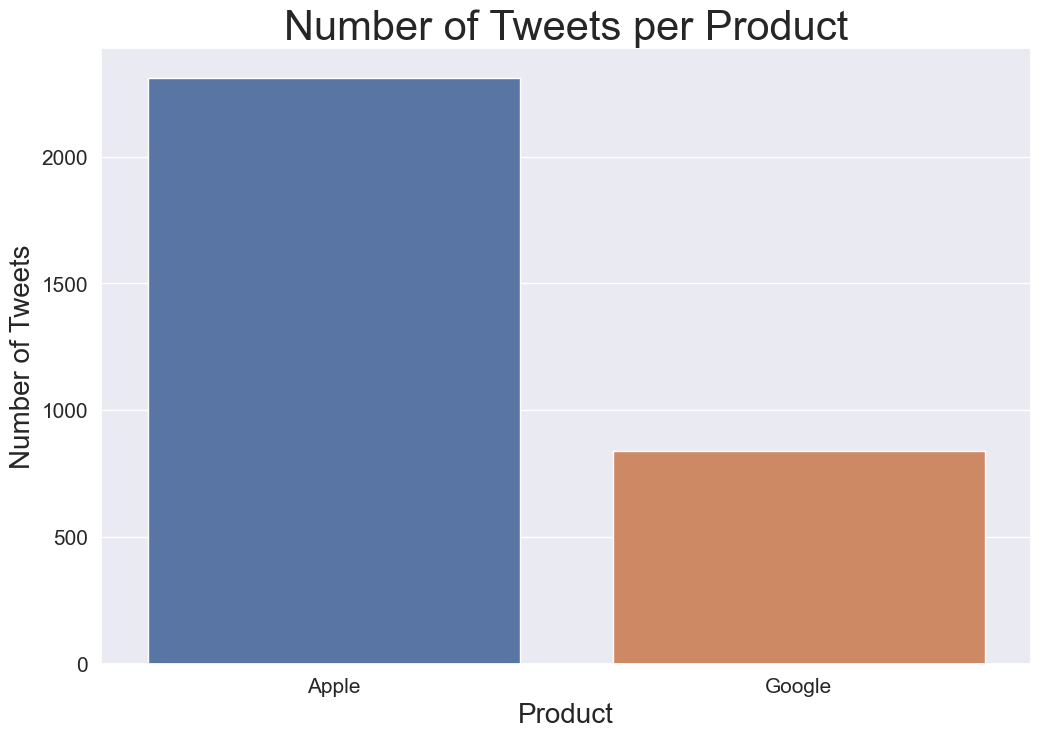

In [203]:
countplot(df, "Product")

Apple has the highest number of products and brands

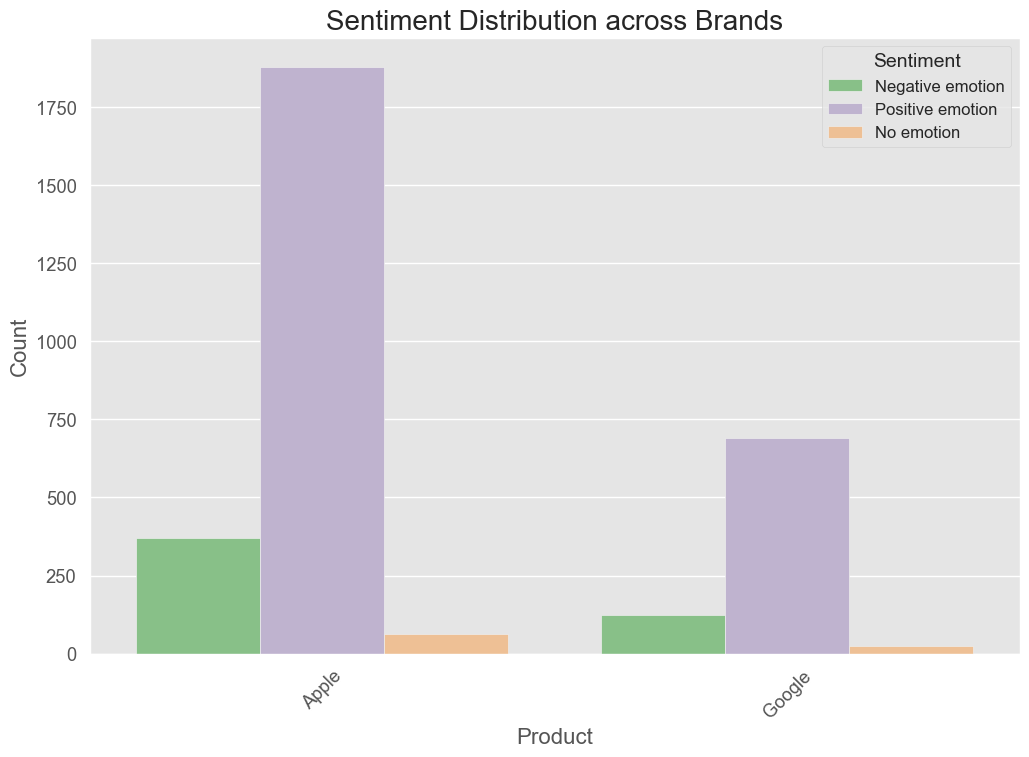

In [171]:
#count plot for Sentiment across brands
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x="Product", hue="Sentiment", palette="Accent")
plt.title('Sentiment Distribution across Brands', fontsize=20)
plt.xlabel('Product', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(title='Sentiment', title_fontsize='14', fontsize='12', loc='upper right')
plt.xticks(rotation=45)
plt.show()

Apple products and brands had the higest number of positive emotion feedback.

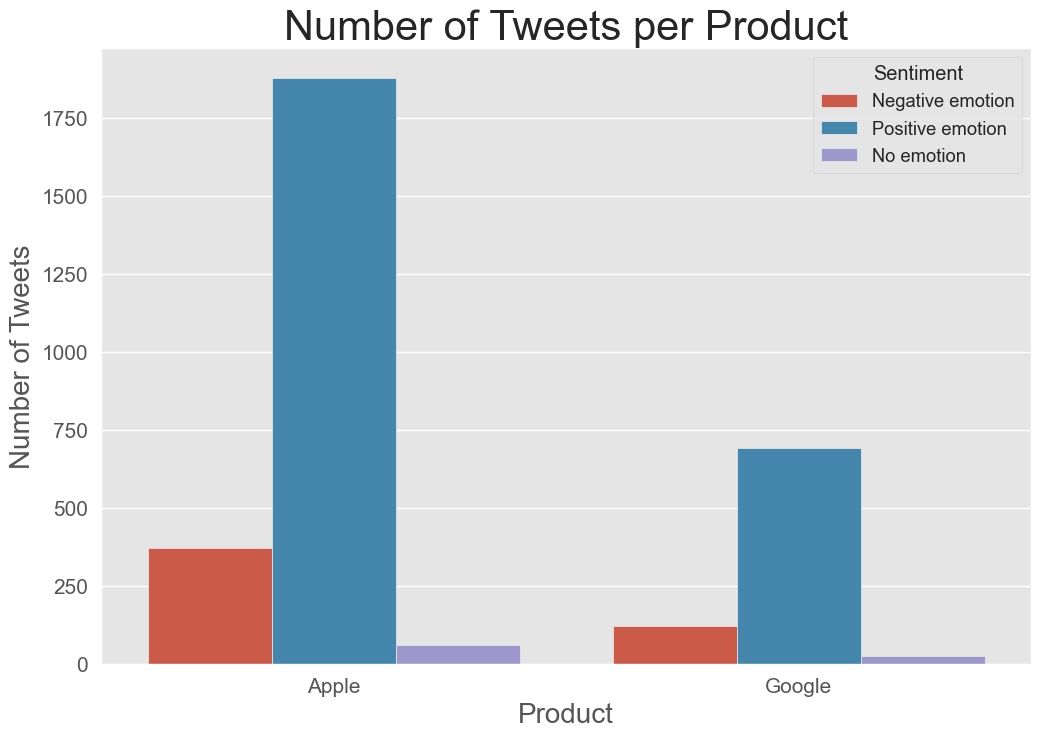

In [174]:
countplot(df, "Product", hue = "Sentiment")

Apple products and brands had the highest number of tweets.

DATA PREPROCESSING AND FEATURE ENGINEERING

In [176]:
# Cleaning text

def cleaner(Tweet):
    Tweet = re.sub(r'@[A-Za-z0-9]+','', str(Tweet)) # removes @
    Tweet = re.sub(r'#', '', str(Tweet)) # removes hashtag
    Tweet = re.sub(r'RT[\s]+','', str(Tweet)) # removes RT
    Tweet = re.sub(r'https?:\/\/\S+', '', Tweet) # remove hyperlink in tweet
    Tweet = re.sub(r'[^\w\s]', '', Tweet) # removes punctuations
    #tweet = re.sub(r'[^a-zA-Z]','', tweet)
    return Tweet
df['Tweet'] = df['Tweet'].apply(cleaner)


C:\Users\Margaret Mitey\AppData\Local\Temp\ipykernel_6820\1886778874.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweet'] = df['Tweet'].apply(cleaner)


In [177]:
#Remove retweets, links and other characters still present
df['Tweet'] = df.Tweet.map(lambda x: re.sub('rt', " ", x)) # Remove rt (retweet)
df['Tweet'] = df.Tweet.map(lambda x: re.sub('link', " ", x))# Remove link
df['Tweet'] = df.Tweet.map(lambda x: re.sub('@', " ", x)) # Remove @
df['Tweet'] = df.Tweet.map(lambda x: re.sub('mention', " ", x)) # Remove mention 
df['Tweet'] = df.Tweet.map(lambda x: re.sub('�+', " ", x)) # remove � character

df.Tweet

C:\Users\Margaret Mitey\AppData\Local\Temp\ipykernel_6820\179663055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweet'] = df.Tweet.map(lambda x: re.sub('rt', " ", x)) # Remove rt (retweet)
C:\Users\Margaret Mitey\AppData\Local\Temp\ipykernel_6820\179663055.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweet'] = df.Tweet.map(lambda x: re.sub('link', " ", x))# Remove link
C:\Users\Margaret Mitey\AppData\Local\Temp\ipykernel_6820\179663055.py:4: SettingWithCopyWarning: 
A value is trying 

0        I have a 3G iPhone After 3 hrs tweeting at RI...
1        Know about   Awesome iPadiPhone app that youl...
2        Can not wait for iPad 2 also They should sale...
3        I hope this years festival isnt as crashy as ...
4        great stuff on Fri SXSW Marissa Mayer Google ...
                              ...                        
8706     your PR guy just convinced me to switch back ...
8708    quotpapyrusso  of like the ipadquot  nice Lol ...
8709    Diller says Google TV quotmight be run over by...
8713    Ive always used Camera for my iPhone bc it has...
8716                               Ipad everywhere SXSW  
Name: Tweet, Length: 3151, dtype: object

In [178]:
#Tokenizaton, Stopword removal and lemmatization of the tweets.
tokenizer = RegexpTokenizer (r'\w{3,}')

# Create a list of stopwords in English
stopwords_list = stopwords.words('english')

# Create an instance of nltk's PorterStemmer with the variable name `stemmer`
stemmer = PorterStemmer()


In [179]:
def preprocess_text(text, tokenizer, stopwords_list, stemmer):
    # Standardize case (lowercase the text)
    text = text.lower()

    # Tokenize text using `tokenizer`
    tokens =tokenizer.tokenize(text)

    # Remove stopwords using `stopwords_list`
    tokens = [token for token in tokens if token not in stopwords_list]

    # Stem the tokenized text using `stemmer`
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    # Return the preprocessed text
    
    return stemmed_tokens
preprocess_text("This is an example sentence for preprocessing.", tokenizer, stopwords_list, stemmer)

['exampl', 'sentenc', 'preprocess']

In [180]:
#Lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize_and_tokenize(text):
    tokens = tokenizer.tokenize(text)
    return [lemmatizer.lemmatize(token) for token in tokens]

In [181]:

#Preprocessing the entire dataset
text_data = df['Tweet'].apply(lambda x: preprocess_text(x, tokenizer, stopwords_list, stemmer))
text_data


0       [iphon, hr, tweet, rise_austin, dead, need, up...
1       [know, awesom, ipadiphon, app, youll, like, ap...
2                          [wait, ipad, also, sale, sxsw]
3       [hope, year, festiv, isnt, crashi, year, iphon...
4       [great, stuff, fri, sxsw, marissa, mayer, goog...
                              ...                        
8706    [guy, convinc, switch, back, iphon, great, sxs...
8708    [quotpapyrusso, like, ipadquot, nice, lol, sxs...
8709    [diller, say, googl, quotmight, run, playstat,...
8713    [ive, alway, use, camera, iphon, imag, stabil,...
8716                              [ipad, everywher, sxsw]
Name: Tweet, Length: 3151, dtype: object

Finally, models require the target variable to be of integer type, so let's assign 0 to No emotion, 1 to Negative emotion toward brand or product and 2 to Positive emotion.

In [182]:
#Reassigning sentiment values to integers
df_copy = df.copy()
df_copy['Sentiment'] = df_copy['Sentiment'].replace({'Positive emotion': 2, 'Negative emotion': 1, 'No emotion toward brand or product': 0})
df = df_copy


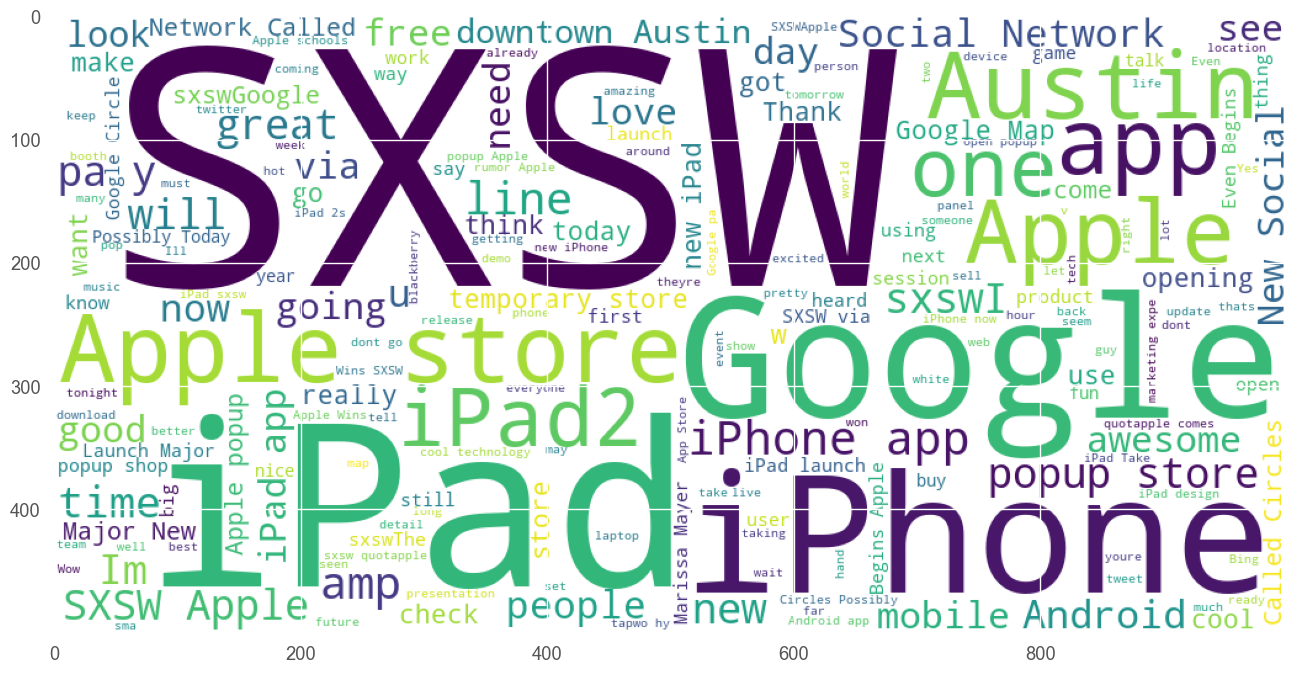

In [183]:

mpl.rcParams['figure.figsize'] = 20,8
sample_data = df['Tweet']

word_cloud =" "
for row in sample_data:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud);

MODELING AND EVALUATION
The step of the project will include the following steps:

Specifying our X and y.
Spliting our data into training and testing data
Vectorizing our data using TF-IDF vectorizer
Choosing a baseline model
Tuning the selected baseline model
Our target variable will be the 'Sentiment' column and our feature variable will be the 'Tweet' column. Once specified we will proceed to split our data with the test size set at 20%.

In [184]:
#Reassigning sentiment values to integers
df_copy = df.copy()
df_copy['Sentiment'] = df_copy['Sentiment'].replace({'Positive emotion': 2, 'Negative emotion': 1, 'No emotion': 0})
df = df_copy

In [185]:
#Specifying x and y
X = df['Tweet']  
y = df['Sentiment']  


In [186]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [187]:
#Vectorizing with TF-IDF

tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [188]:
#Choosing a baseline model
baseline_model = MultinomialNB()
baseline_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [189]:
#Tuning the baseline model
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],  # Add more alpha values if needed
}

grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

best_model = grid_search.best_estimator_


In [190]:
#Evaluating performance of the model

# Make predictions
y_pred = best_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8431061806656102


c:\Users\Margaret Mitey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Margaret Mitey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Margaret Mitey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.86      0.18      0.30       101
           2       0.84      0.99      0.91       517

    accuracy                           0.84       631
   macro avg       0.57      0.39      0.40       631
weighted avg       0.83      0.84      0.79       631

Confusion Matrix:
 [[  0   0  13]
 [  0  18  83]
 [  0   3 514]]


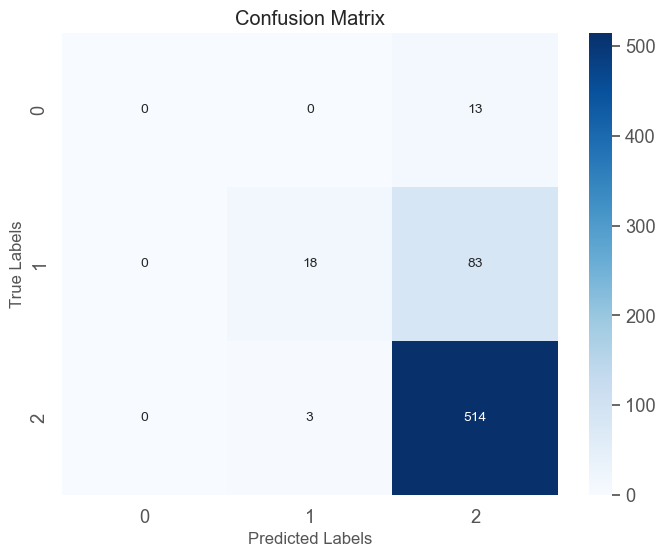

In [191]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


Random Forest Classifier

In [192]:
# Initialize and train the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [193]:
#Make prediction
y_pred = random_forest.predict(X_test_tfidf)


In [194]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)

c:\Users\Margaret Mitey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Margaret Mitey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Margaret Mitey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8541996830427893
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.81      0.29      0.42       101
           2       0.86      0.99      0.92       517

    accuracy                           0.85       631
   macro avg       0.55      0.42      0.45       631
weighted avg       0.83      0.85      0.82       631

Confusion Matrix:
 [[  0   0  13]
 [  0  29  72]
 [  0   7 510]]


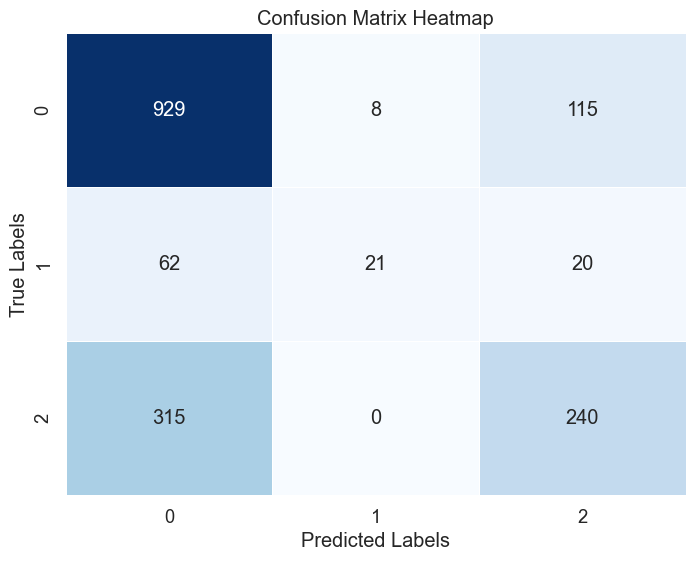

In [195]:
# Replace these with your actual results
conf_matrix = [[929, 8, 115], [62, 21, 20], [315, 0, 240]]
labels = ['0', '1', '2']  # Labels for the classes

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font scale for better readability
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False, xticklabels=labels, yticklabels=labels)

# Set axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

# Display the plot
plt.show()


Support Vector Machine

Used for multi-class sentiment analysis

In [196]:
#Initializing SVM
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

#Making Predictions
y_pred = svm_classifier.predict(X_test_tfidf)

#Evaluating Performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)

c:\Users\Margaret Mitey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Margaret Mitey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8637083993660856
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.85      0.33      0.47       101
           2       0.86      0.99      0.92       517

    accuracy                           0.86       631
   macro avg       0.57      0.44      0.46       631
weighted avg       0.84      0.86      0.83       631

Confusion Matrix:
 [[  0   1  12]
 [  0  33  68]
 [  0   5 512]]


c:\Users\Margaret Mitey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


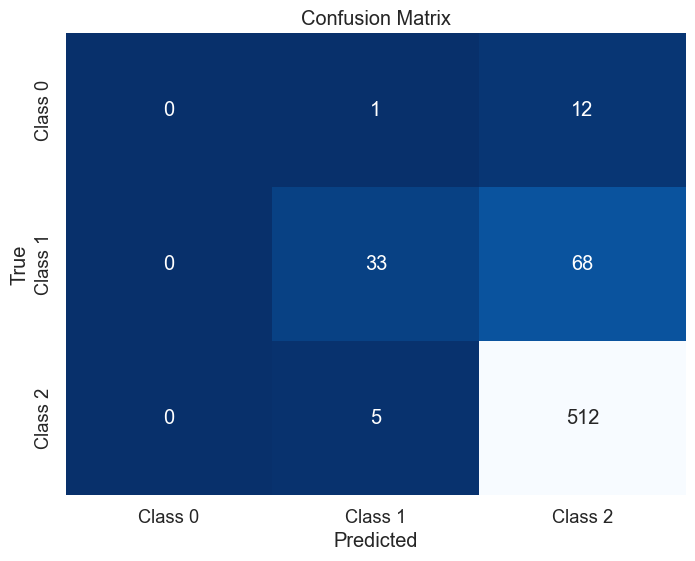

In [197]:
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues_r', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Hyperparameter Tuning

In [198]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'auto']
}

# Create the SVM model
svm = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)  # Use TF-IDF features for text vectorization

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final model with the best hyperparameters
final_svm = SVC(**best_params)
final_svm.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = final_svm.predict(X_test_tfidf)

# Evaluate the final model on the test set
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Final Model Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


c:\Users\Margaret Mitey\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Final Model Accuracy: 0.8716323296354992
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.08      0.14        13
           1       0.79      0.42      0.55       101
           2       0.88      0.98      0.93       517

    accuracy                           0.87       631
   macro avg       0.89      0.49      0.54       631
weighted avg       0.87      0.87      0.85       631

Confusion Matrix:
 [[  1   1  11]
 [  0  42  59]
 [  0  10 507]]
